In [18]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
import matplotlib
import matplotlib.pyplot as plt

In [8]:
xgb = pd.read_csv('data/train_XGB_FE2_No_fillNaN2.csv')
ff = pd.read_csv('data/train_FF.csv')
logistic_reg = pd.read_csv('data/train_logistic_regressin_pca.csv')

In [9]:
train_pca = np.load('data/train_PCA.npy')
train_SK_ID_CURR = np.load('data/train_SK_ID_CURR.npy')
train_label = np.load('data/train_label.npy')

In [10]:
ll_wrong = np.sum((logistic_reg['TARGET'] >= 0.5) != (train_label == 1))
ff_wrong = np.sum((ff['TARGET'] >= 0.5) != (train_label == 1))
xgb_wrong = np.sum((xgb['TARGET'] >= 0.5) != (train_label == 1))

In [11]:
print("Logistic regression wrong", ll_wrong, 'out of', len(train_label), ", which is", ll_wrong/len(train_label)*100, '%')
print("Feedforward wrong", ff_wrong, 'out of', len(train_label), ", which is", ll_wrong/len(train_label)*100, '%')
print("Feedforward wrong", xgb_wrong, 'out of', len(train_label), ", which is", xgb_wrong/len(train_label)*100, '%')

Logistic regression wrong 24825 out of 307511 , which is 8.072881945686495 %
Feedforward wrong 24334 out of 307511 , which is 8.072881945686495 %
Feedforward wrong 31951 out of 307511 , which is 10.390197423831992 %


In [12]:
print("logistic regression auc = %.4f" % roc_auc_score(y_true=train_label, y_score=logistic_reg['TARGET']))
print("logistic feedforward auc = %.4f" % roc_auc_score(y_true=train_label, y_score=ff['TARGET']))
print("logistic xgboost auc = %.4f" % roc_auc_score(y_true=train_label, y_score=xgb['TARGET']))

logistic regression auc = 0.7385
logistic feedforward auc = 0.8161
logistic xgboost auc = 0.8265


In [13]:
train_label = pd.DataFrame([1.0 if label==True else 0.0 for label in train_label])

In [14]:
train_label[0]

0         1.0
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10        0.0
11        0.0
12        0.0
13        0.0
14        0.0
15        0.0
16        0.0
17        0.0
18        0.0
19        0.0
20        0.0
21        0.0
22        0.0
23        0.0
24        0.0
25        0.0
26        1.0
27        0.0
28        0.0
29        0.0
         ... 
307481    1.0
307482    0.0
307483    0.0
307484    0.0
307485    0.0
307486    0.0
307487    0.0
307488    0.0
307489    1.0
307490    0.0
307491    0.0
307492    0.0
307493    0.0
307494    0.0
307495    0.0
307496    0.0
307497    0.0
307498    0.0
307499    0.0
307500    0.0
307501    0.0
307502    0.0
307503    0.0
307504    0.0
307505    0.0
307506    0.0
307507    0.0
307508    0.0
307509    1.0
307510    0.0
Name: 0, Length: 307511, dtype: float64

In [15]:
logistic_reg['TARGET']

0         0.255203
1         0.116377
2         0.100402
3         0.128122
4         0.146647
5         0.144009
6         0.076653
7         0.112420
8         0.133403
9         0.107928
10        0.159379
11        0.096778
12        0.149701
13        0.101528
14        0.104422
15        0.199144
16        0.243766
17        0.108871
18        0.120301
19        0.130227
20        0.147433
21        0.166434
22        0.188734
23        0.090798
24        0.117339
25        0.107043
26        0.161329
27        0.136091
28        0.119680
29        0.155032
            ...   
307481    0.113512
307482    0.134813
307483    0.095709
307484    0.096019
307485    0.090073
307486    0.108967
307487    0.191063
307488    0.149240
307489    0.194717
307490    0.171474
307491    0.122033
307492    0.125305
307493    0.153499
307494    0.112677
307495    0.132823
307496    0.133045
307497    0.149192
307498    0.124539
307499    0.134051
307500    0.095513
307501    0.170791
307502    0.

In [16]:
classification_report(y_true=train_label[0], y_pred=logistic_reg['TARGET'])

ValueError: Mix type of y not allowed, got types {'continuous', 'binary'}

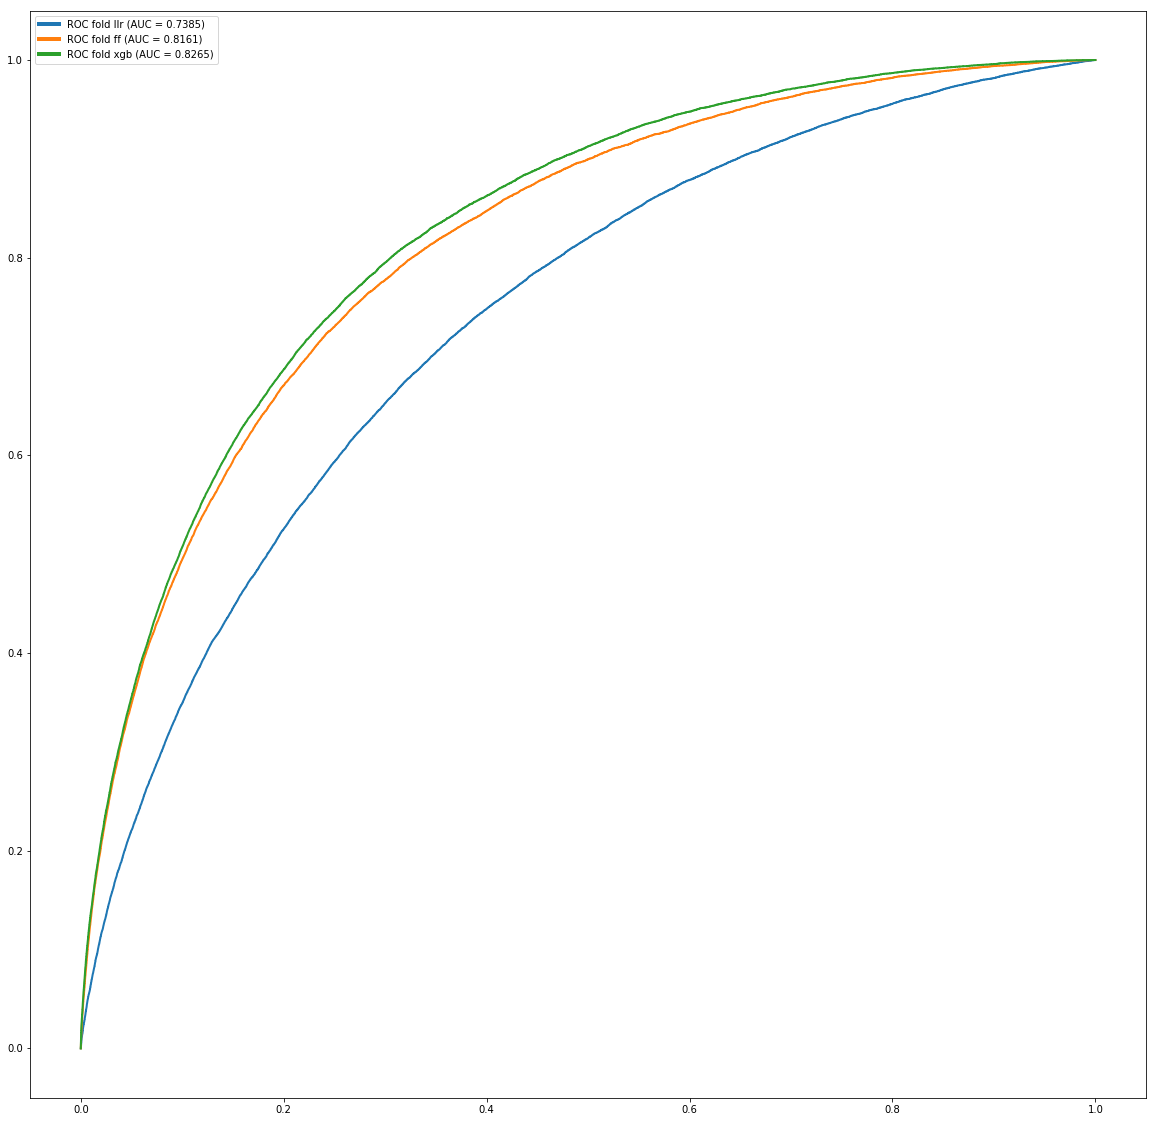

In [25]:
legend = []
plt.figure(figsize=(20,20))

fpr, tpr, thresholds = roc_curve(train_label[0], logistic_reg['TARGET'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, alpha=1,label='ROC fold llr (AUC = %0.4f)' % (roc_auc))
legend.append('ROC fold llr (AUC = %0.4f)' % (roc_auc))

fpr, tpr, thresholds = roc_curve(train_label[0], ff['TARGET'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, alpha=1,label='ROC fold ff (AUC = %0.4f)' % (roc_auc))
legend.append('ROC fold ff (AUC = %0.4f)' % (roc_auc))

fpr, tpr, thresholds = roc_curve(train_label[0], xgb['TARGET'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, alpha=1,label='ROC fold xgb (AUC = %0.4f)' % (roc_auc))
legend.append('ROC fold xgb (AUC = %0.4f)' % (roc_auc))

plt.legend(legend)

for line in plt.legend().get_lines():
    line.set_linewidth(4)

plt.show()